In [74]:

import numpy as np

In [75]:
import pandas as pd
data_path = 'C:\\Users\\mehedee\\Documents\\data\\course\\UDEMY_TSA_FINAL\\Data\\'
airline = pd.read_csv(data_path+'airline_passengers.csv',index_col='Month',parse_dates=True)
# index_col='Date',parse_dates=True

In [76]:
airline.index.freq = 'MS'

In [77]:
airline.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [78]:
# learg portion must be training data
train_data = airline.iloc[:109]
test_data = airline.iloc[108:]

In [79]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [80]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [81]:
test_predictions = fitted_model.forecast(36)

In [82]:
test_predictions.plot()

In [83]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST')

In [84]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN',figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True,label='TEST')
test_predictions.plot(legend=True,label='PREDICTION',xlim=['1958-01-01','1961-01-01'])

### mean squared error , true - predicted value
    - any thing square will be positive
    - really unishing the model to have really large error


In [85]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [86]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [87]:
mean_absolute_error(test_data,test_predictions)

47.514539363647344

In [88]:
mean_squared_error(test_data,test_predictions)

3079.4274706810565

In [89]:
np.sqrt(mean_squared_error(test_data,test_predictions))

55.4925893311986

In [90]:
final_model = ExponentialSmoothing(airline['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [91]:
forecasts_preditions = final_model.forecast(36)

In [92]:
airline['Thousands of Passengers'].plot(figsize=(12,8))
forecasts_preditions.plot()

In [93]:
df2 = pd.read_csv(data_path+'samples.csv',index_col=0,parse_dates=True)

In [94]:

df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


In [95]:
# stationary data
# doesn't exibits trends and seasonality 

df2['a'].plot()

In [96]:
# now see the b column

In [97]:
# no seasnality but clear trend 
# any seasonality or trend 


df2['b'].plot()


In [98]:
from statsmodels.tsa.statespace.tools import diff

In [99]:
# first order different
df2['b'] - df2['b'].shift(1)

1950-01-01     NaN
1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 120, dtype: float64

In [100]:
diff(df2['b'],k_diff=1).plot()

In [101]:
# ACF and PACF the term correlation
# the measure of the length 

In [102]:
# correlation values


In [103]:
# after a certain number of relation we have to think that the relation is decreasng by the relaiton as shown in the graph using shadow
# sharp drop off may have occurs 
# the further away you go the less these are auto correlated 
# the plot type 

In [104]:
# partial auto correlation

In [105]:
# The ACF describes the autocorrelation between an observation and another 
# observation at the prior time step that includes direct and indirect dependence
# information.


In [125]:
import pandas as pd
import numpy as np
%matplotlib qt

In [126]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols

In [127]:
# non Stationary 
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [128]:
df1 = airline

In [129]:
df1.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [130]:
df2 = pd.read_csv(data_path+'DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)


In [131]:

df2.plot()

In [132]:
df2.index.freq='D'

In [133]:
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [134]:
import warnings 
warnings.filterwarnings('ignore')

In [135]:
# daily data vs monthly data

In [136]:
import warnings 
warnings.filterwarnings('ignore')

In [137]:
df4 = pd.DataFrame({'a':[13,5,11,9]})

In [138]:
df4

,a
0,13
1,5
2,11
3,9


In [139]:
acf(df4['a'])

array([ 1.        , -0.66428571,  0.21428571, -0.05      ])

In [141]:
pacf_yw(df4['a'],nlags= 4,method='mle') #yol walker .there are 5 lags 

array([ 1.        , -0.66428571, -0.40626427, -0.25658399, -0.19262825])

In [143]:
# partial auto correlation function
# unbiased function

In [144]:
pacf_ols(df4['a'],nlags=4)

ValueError: maxlag should be < nobs

In [146]:
# pearson correlation funcion 
# measuring 

In [148]:
from pandas.plotting import lag_plot

In [149]:
lag_plot(df1['Thousands of Passengers'])

In [150]:
lag_plot(df2['Births'])

In [154]:
%matplotlib inline

In [155]:
from statsmodels.graphics.tsaplots import plot_acf ,plot_pacf

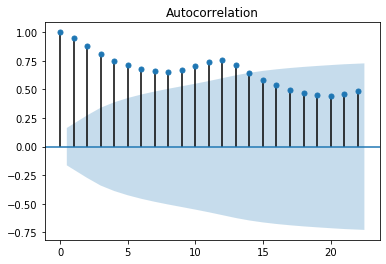

In [158]:
plot_acf(df1);

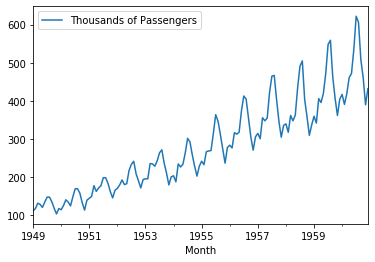

In [159]:
df1.plot();

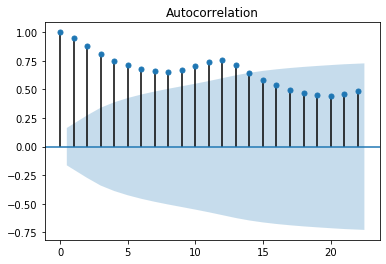

In [161]:
plot_acf(df1);

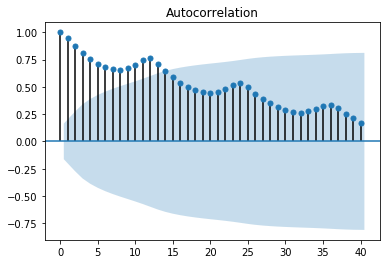

In [163]:
plot_acf(df1,lags=40); # e dont need many ,we have 140 lags but we dont need that much
